In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from mplsoccer.pitch import Pitch

from scipy.spatial import ConvexHull
from scipy import stats

In [35]:
df = pd.read_csv('E:/mckayjohns/data/convextutorial.csv')

In [36]:
df

,eventId,minute,second,teamId,x,y,playerId,type/displayName,type/value
0,2,0,0.0,65,0.0,0.0,NaN,Start,32
1,2,0,0.0,833,0.0,0.0,NaN,Start,32
2,3,0,1.0,833,50.8,51.5,303800.0,Pass,1
3,4,0,4.0,833,28.4,58.4,316957.0,Pass,1
4,5,0,7.0,833,66.6,24.7,303800.0,BallTouch,61
...,...,...,...,...,...,...,...,...,...
1576,1018,92,7.0,65,0.0,0.0,NaN,End,30
1577,1019,0,0.0,65,0.0,0.0,NaN,End,30
1578,676,0,0.0,833,0.0,0.0,NaN,End,30
1579,1,0,0.0,65,0.0,0.0,NaN,FormationSet,34


In [37]:
df = df.fillna(0)

df['y'] = .8*df['y']
df['x'] = 1.2*df['x']

In [38]:
df = df[df['teamId']==65]
df

,eventId,minute,second,teamId,x,y,playerId,type/displayName,type/value
0,2,0,0.0,65,0.00,0.00,0.0,Start,32
5,3,0,8.0,65,33.48,64.48,5.0,BallRecovery,49
6,4,0,9.0,65,36.72,51.44,5.0,Pass,1
7,5,0,13.0,65,31.68,17.92,28.0,Pass,1
8,6,0,18.0,65,35.04,30.16,4.0,Pass,1
...,...,...,...,...,...,...,...,...,...
1569,1016,92,3.0,65,110.64,50.40,17.0,Dispossessed,50
1574,1017,92,6.0,65,90.72,66.80,5.0,Interception,8
1576,1018,92,7.0,65,0.00,0.00,0.0,End,30
1577,1019,0,0.0,65,0.00,0.00,0.0,End,30


In [39]:
df['playerId'] = df['playerId'].astype(int)

In [40]:
players = df['playerId'].unique()
players

array([ 0,  5, 28,  4, 23,  7, 11, 21,  1,  9, 18, 16, 17, 12])

In [41]:
starters = players[1:12]
starters

array([ 5, 28,  4, 23,  7, 11, 21,  1,  9, 18, 16])

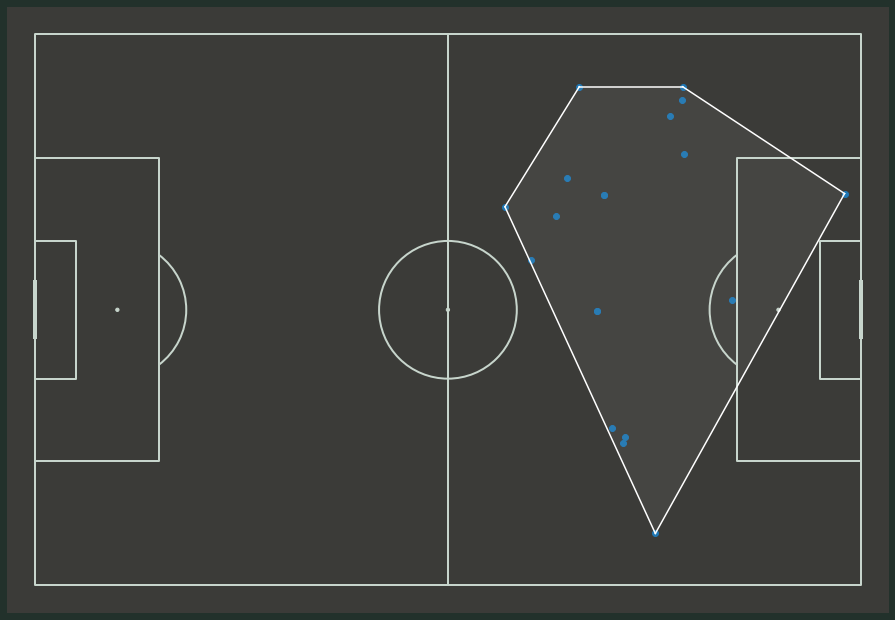

In [47]:
# fig.set_facecolor('#3b3b38')
# ax.patch.set_facecolor('#3b3b38')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#3b3b38', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13,8.5), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

plt.gca().invert_yaxis()

df1 = df[df['playerId']==9]
df1 =df1[df1['type/value']==1]

df1 = df1[(np.abs(stats.zscore(df1[['x','y']]))<.5)]
points = df1[['x','y']].values
hull = ConvexHull(df1[['x','y']])
plt.scatter(df1.x,df1.y)

for i in hull.simplices:
    plt.plot(points[i,0],points[i,1],'white')
    plt.fill(points[hull.vertices,0],points[hull.vertices,1],c='white',alpha=.01)

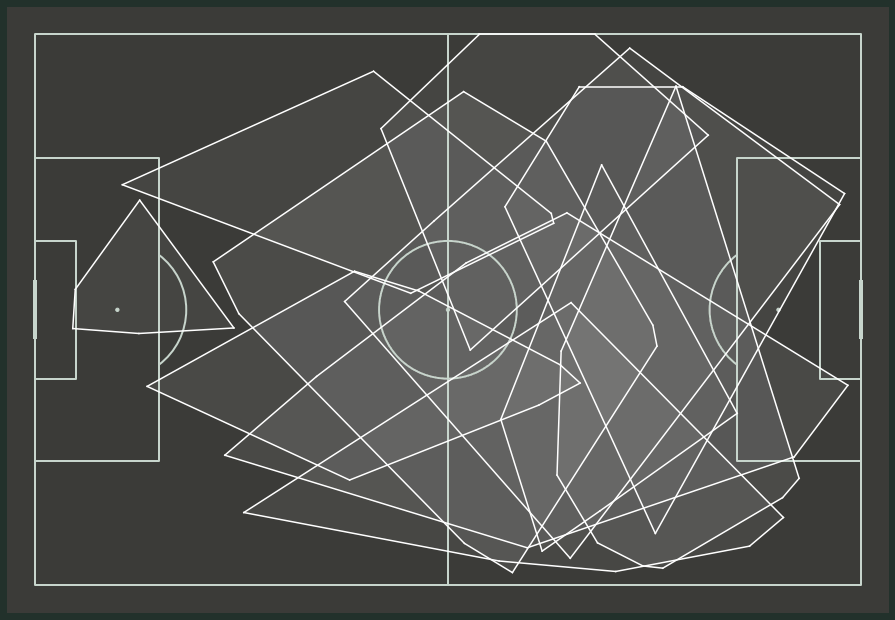

In [21]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#3b3b38', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13,8.5), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

plt.gca().invert_yaxis()

for player in starters:
    df2 = df[df['playerId']==player]
    df2 =df2[df2['type/value']==1]
    
    df2 = df2[(np.abs(stats.zscore(df2[['x','y']]))<.5)]
    
    points = df2[['x','y']].values
    
    try:
        hull = ConvexHull(df2[['x','y']])
    except :
        pass
        
    try:
        for i in hull.simplices:
            plt.plot(points[i,0],points[i,1],'white')
            plt.fill(points[hull.vertices,0],points[hull.vertices,1],c='white',alpha=.01)
    except:
        pass
    